In [3]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [4]:
analysis = scripts.Analysis()

In [5]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'P_50_T_250',
                          'min_5.e-24_max_7.647e-18_ng_8',
                          'wgt_-.2_-.2_-.2_-.2_-.2_-.2_-.2_-.2',
                          'dg',
                          'tropical')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [6]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band02_wn_340_540',
                               'P_50_T_250',
                               'min_5.e-24_max_7.647e-18_ng_8',
                               'wgt_-.2_-.2_-.2_-.2_-.2_-.2_-.2_-.2',
                               'dg',
                               'tropical')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [7]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7, 8]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [8]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [9]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [10]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
for g in [1, 2, 3, 4, 5, 6, 7, 8]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

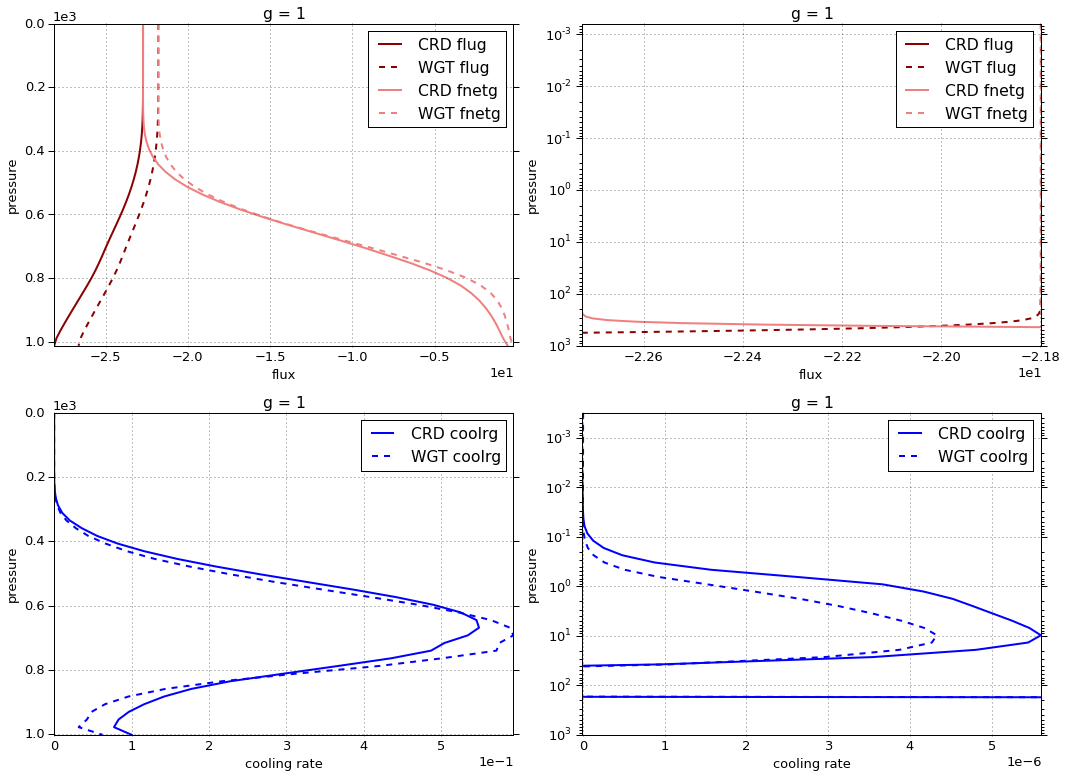

# Figure: flux, cooling rate. g-group 2

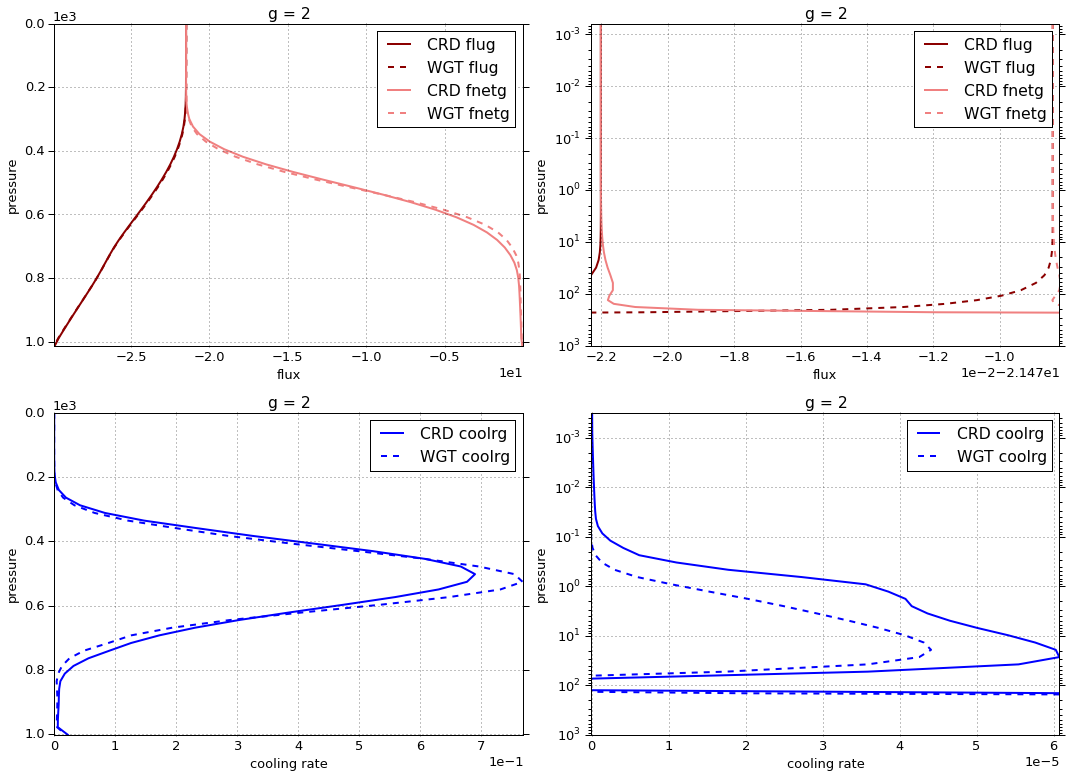

# Figure: flux, cooling rate. g-group 3

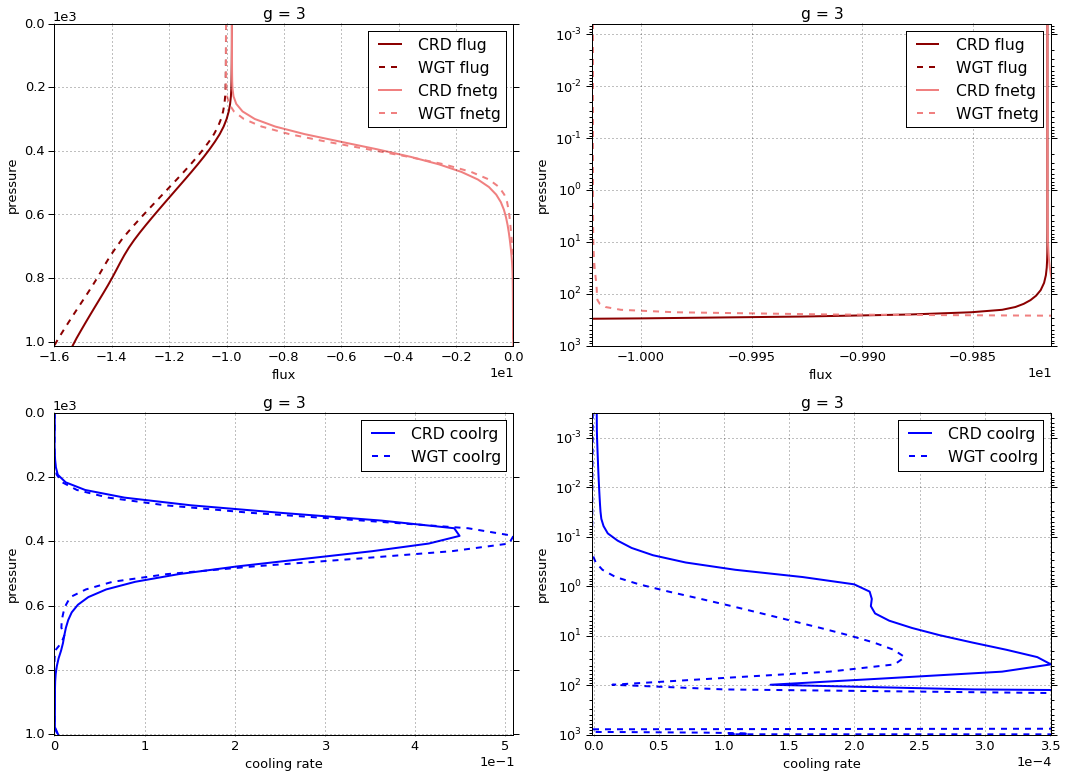

# Figure: flux, cooling rate. g-group 4

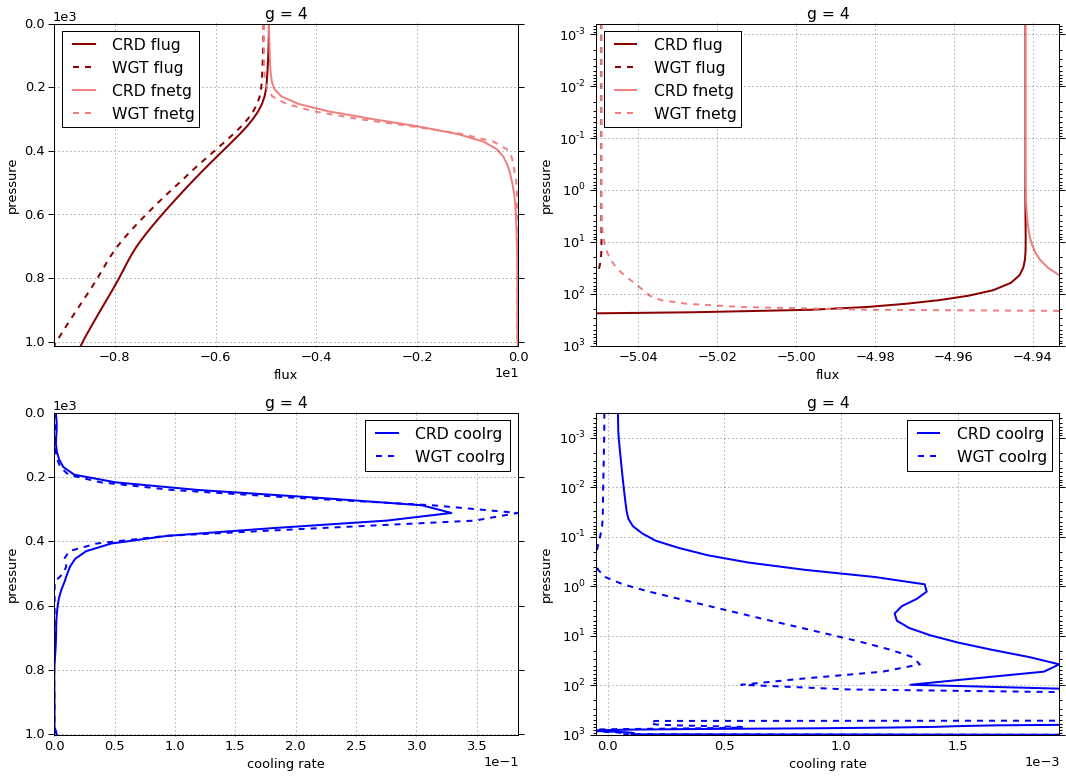

# Figure: flux, cooling rate. g-group 5

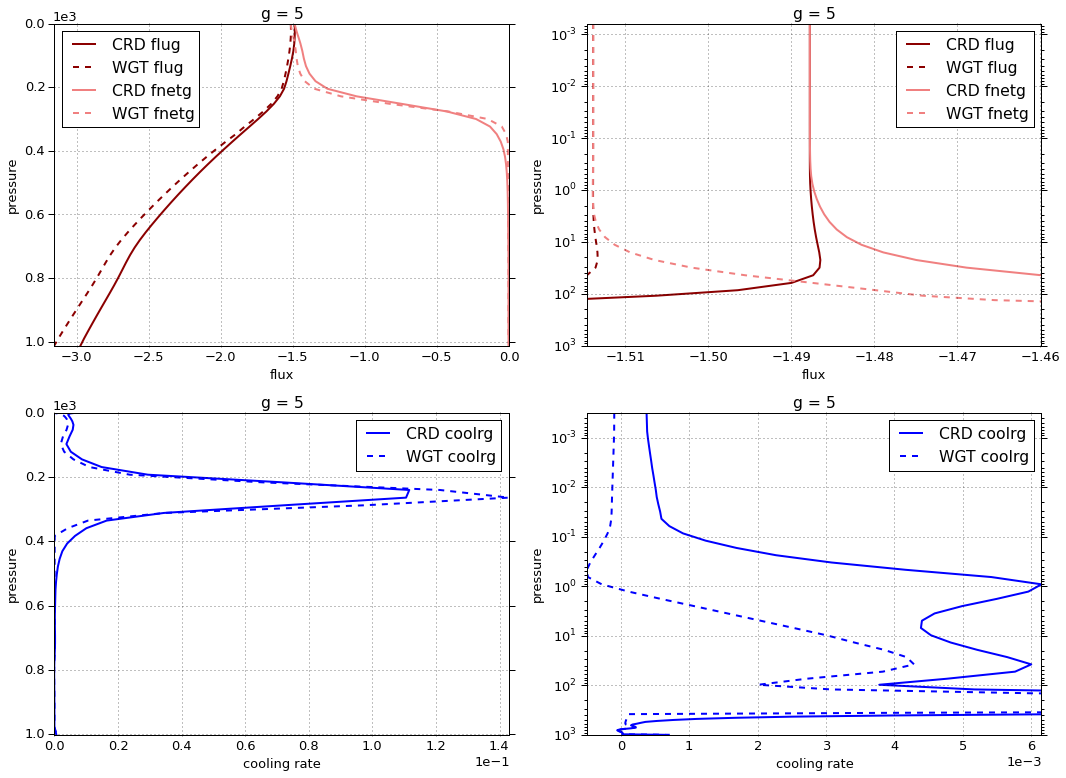

# Figure: flux, cooling rate. g-group 6

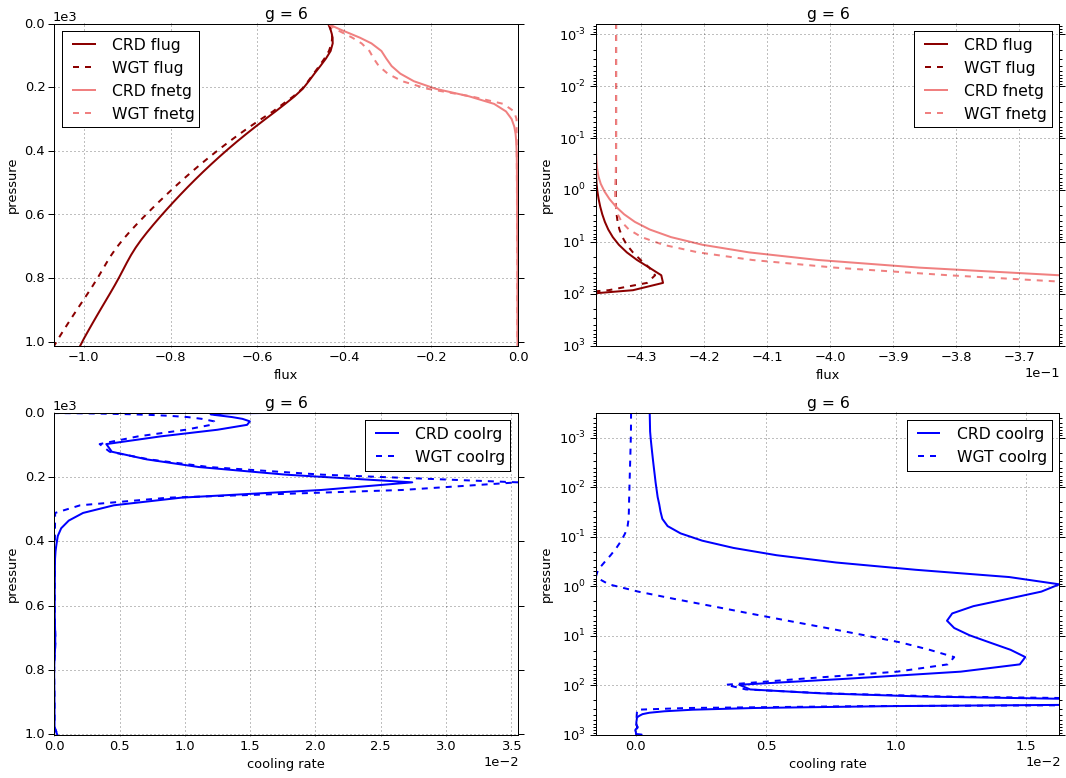

# Figure: flux, cooling rate. g-group 7

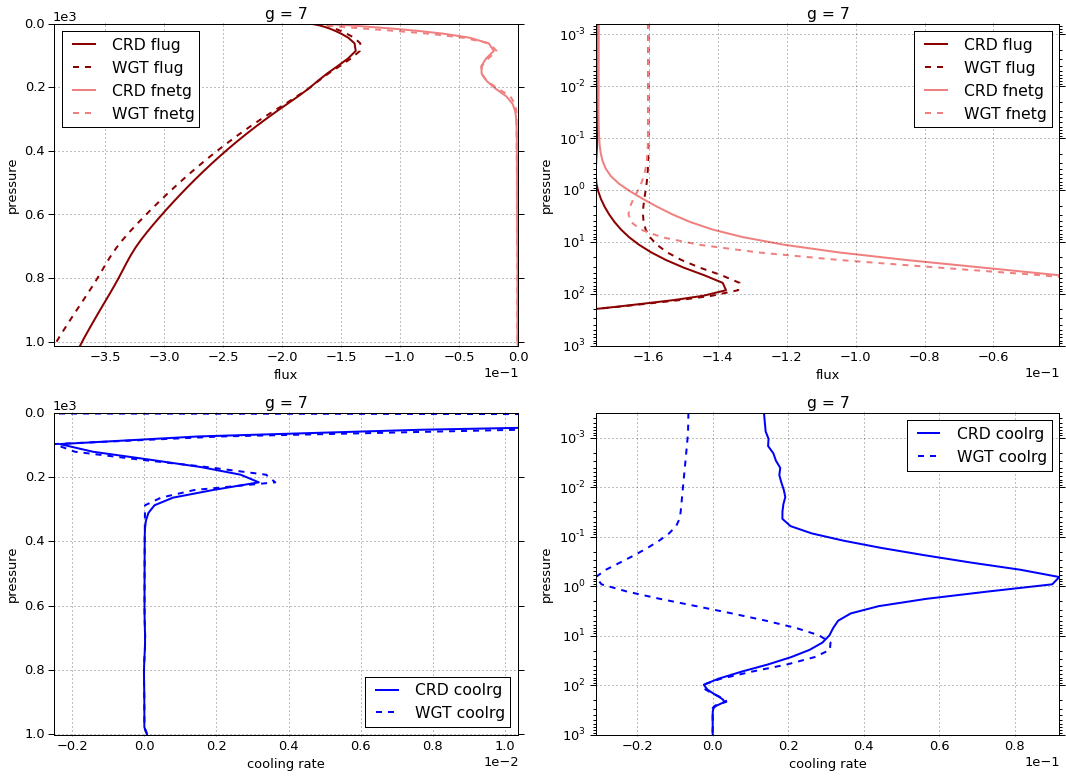

# Figure: flux, cooling rate. g-group 8

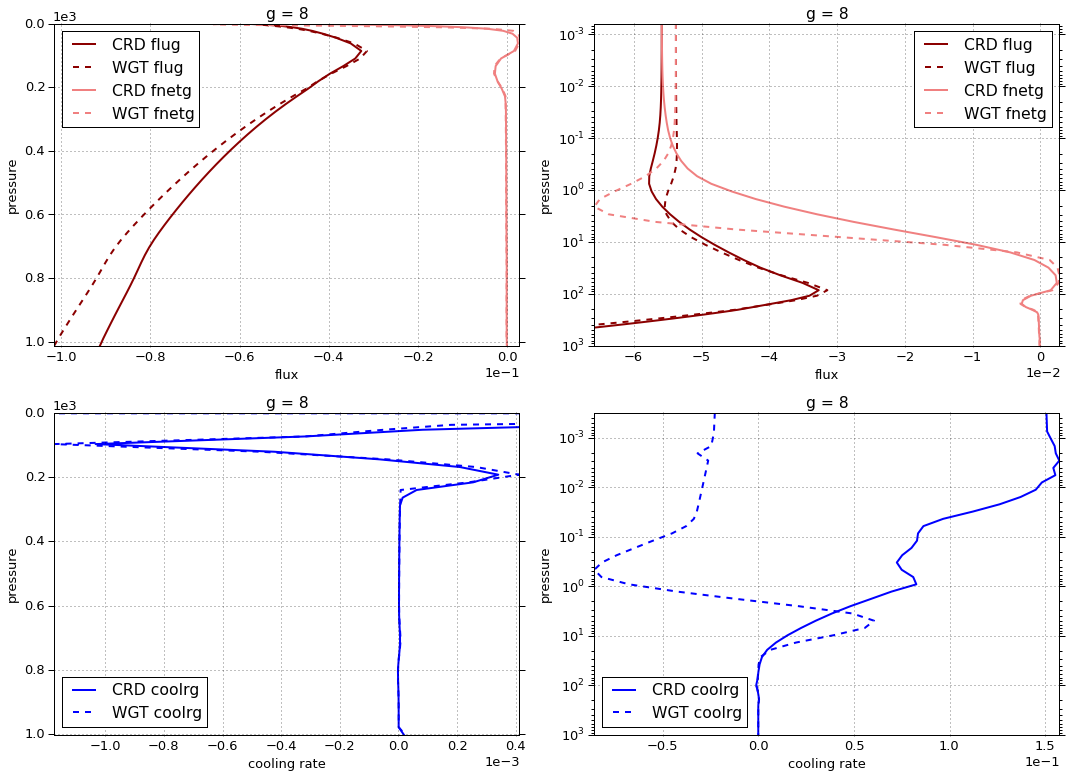

# Figure: flux, cooling rate. g-group total

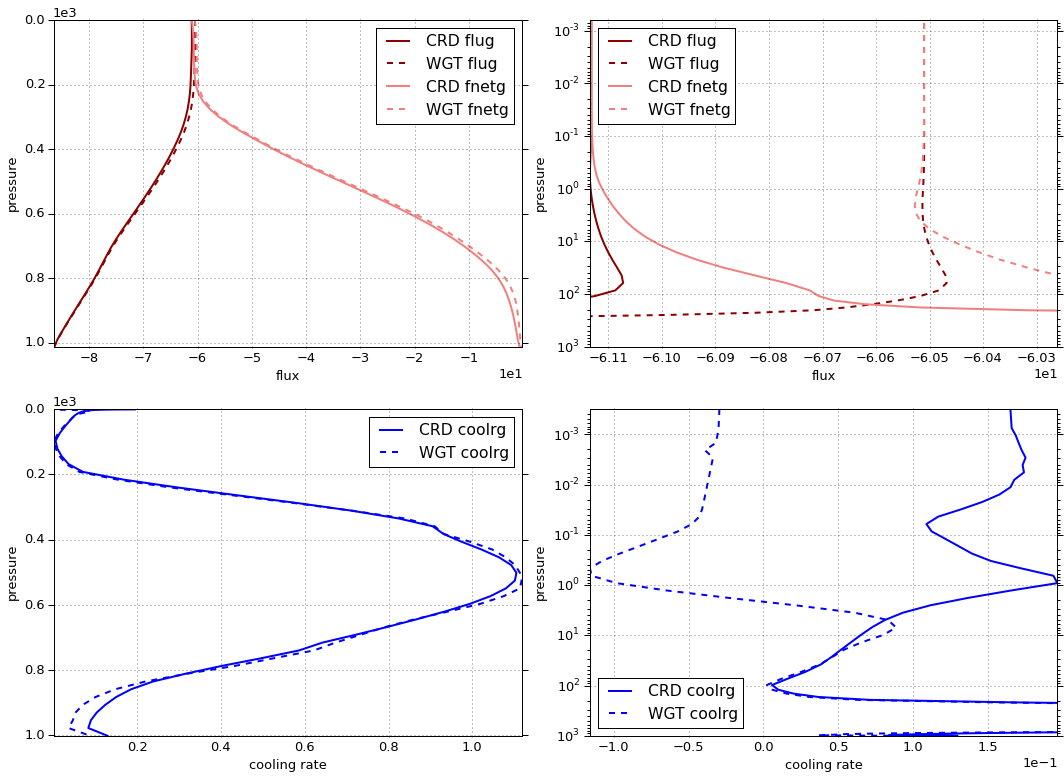

In [15]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [16]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0        1     -22.725950   0.000000 -22.725950
  1013     76    -28.128623  27.571667  -0.556955
2 0        1     -21.492012   0.000000 -21.492012
  1013     76    -29.862336  29.801408  -0.060928
3 0        1      -9.816388   0.000000  -9.816388
  1013     76    -15.364952  15.353091  -0.011861
4 0        1      -4.942018   0.000000  -4.942018
  1013     76     -8.674164   8.668697  -0.005467
5 0        1      -1.487769   0.000000  -1.487769
  1013     76     -2.974341   2.972583  -0.001758
6 0        1      -0.437227   0.000000  -0.437227
  1013     76     -1.008036   1.007440  -0.000596
7 0        1      -0.174707   0.000000  -0.174707
  1013     76     -0.371471   0.371251  -0.000219
8 0        1      -0.055882   0.000000  -0.055882
  1013     76     -0.091343   0.091292  -0.000051


WGT


flug       fldg      fnetg
g pressure level                                 
1 0        1     -21.798938   0.000000 -21.798938
  1013     76    -26.647353  26.428923  -0.218430
2 0        1     -21.478409   0.000000 -21.478409
  1013     76    -29.900985  29.854684  -0.046301
3 0        1     -10.021812   0.000000 -10.021812
  1013     76    -16.006572  15.996499  -0.010072
4 0        1      -5.049396   0.000000  -5.049396
  1013     76     -9.200968   9.195178  -0.005790
5 0        1      -1.513888   0.000000  -1.513888
  1013     76     -3.156347   3.154361  -0.001986
6 0        1      -0.434013   0.000000  -0.434013
  1013     76     -1.067970   1.067298  -0.000672
7 0        1      -0.160157   0.000000  -0.160157
  1013     76     -0.393462   0.393215  -0.000248
8 0        1      -0.053791   0.000000  -0.053791
  1013     76     -0.101608   0.101544  -0.000064


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.927012  0.000000  0.927012
  1013     76     1.481270 -1.142744  0.338525
2 0        1      0.013603  0.000000  0.013603
  1013     76    -0.038649  0.053276  0.014627
3 0        1     -0.205424  0.000000 -0.205424
  1013     76    -0.641620  0.643408  0.001789
4 0        1     -0.107378  0.000000 -0.107378
  1013     76    -0.526804  0.526482 -0.000323
5 0        1     -0.026119  0.000000 -0.026119
  1013     76    -0.182006  0.181778 -0.000228
6 0        1      0.003214  0.000000  0.003214
  1013     76    -0.059933  0.059857 -0.000076
7 0        1      0.014550  0.000000  0.014550
  1013     76    -0.021992  0.021964 -0.000028
8 0        1      0.002091  0.000000  0.002091
  1013     76    -0.010265  0.010253 -0.000013

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.537043e-08
  1001.112500 75     1.001533e-01
2 0.000312    1      6.498812e-08
  1001.112500 75     2.237054e-02
3 0.000312    1      2.395602e-06
  1001.112500 75     4.232636e-03
4 0.000312    1      4.343100e-05
  1001.112500 75     1.973362e-03
5 0.000312    1      3.737675e-04
  1001.112500 75     6.330270e-04
6 0.000312    1      5.345804e-04
  1001.112500 75     2.143492e-04
7 0.000312    1      1.358049e-02
  1001.112500 75     7.888114e-05
8 0.000312    1      1.506075e-01
  1001.112500 75     1.843182e-05


WGT


coolrg
g pressure    layer              
1 0.000312    1      1.633109e-09
  1001.112500 75     6.251773e-02
2 0.000312    1     -4.154821e-08
  1001.112500 75     1.903584e-02
3 0.000312    1     -6.566057e-07
  1001.112500 75     3.620176e-03
4 0.000312    1     -1.471200e-05
  1001.112500 75     2.080966e-03
5 0.000312    1     -9.907075e-05
  1001.112500 75     7.138651e-04
6 0.000312    1     -1.825463e-04
  1001.112500 75     2.415407e-04
7 0.000312    1     -6.410776e-03
  1001.112500 75     8.898866e-05
8 0.000312    1     -2.270834e-02
  1001.112500 75     2.298059e-05


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.700354e-08
  1001.112500 75    -3.763556e-02
2 0.000312    1     -1.065363e-07
  1001.112500 75    -3.334700e-03
3 0.000312    1     -3.052208e-06
  1001.112500 75    -6.124601e-04
4 0.000312    1     -5.814300e-05
  1001.112500 75     1.076036e-04
5 0.000312    1     -4.728382e-04
  1001.112500 75     8.083810e-05
6 0.000312    1     -7.171267e-04
  1001.112500 75     2.719148e-05
7 0.000312    1     -1.999127e-02
  1001.112500 75     1.010752e-05
8 0.000312    1     -1.733158e-01
  1001.112500 75     4.548772e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-61.131950,0.000000,-61.131950
1013,76,-86.475266,85.837429,-0.637836



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-60.510403,0.000000,-60.510403
1013,76,-86.475266,86.191702,-0.283563



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,6.215473e-01,0.000000,0.621547
1013,76,-6.300002e-08,0.354274,0.354273


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.165142
1001.112500,75,0.129675



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.029416
1001.112500,75,0.088322



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.194558
1001.112500,75,-0.041352


In [17]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.308150,0.315652
2,0.345775,0.346497
3,0.185100,0.181385
4,0.106400,0.103438
5,0.036500,0.035475
6,0.012350,0.012011
7,0.004550,0.004429
8,0.001175,0.001114


In [18]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -22.725950  0.000000e+00 -22.725950   1     1   
0.000624      1     2 -22.725950  4.761195e-12 -22.725950   1     2   
0.000876      1     3 -22.725950  6.712563e-12 -22.725950   1     3   
0.001229      1     4 -22.725950  9.529638e-12 -22.725950   1     4   
0.001723      1     5 -22.725950  1.361296e-11 -22.725950   1     5   
0.002417      1     6 -22.725950  1.953552e-11 -22.725950   1     6   
0.003391      1     7 -22.725950  2.812425e-11 -22.725950   1     7   
0.004757      1     8 -22.725950  4.061345e-11 -22.725950   1     8   
0.006672      1     9 -22.725950  5.884250e-11 -22.725950   1     9   
0.009359      1    10 -22.725950  8.557717e-11 -22.725950   1    10   
0.013128      1    11 -22.725950  1.249941e-10 -22.725950   1    11   
0.018415      1    12 -22.725950  1.835761e-10 -22.725950   1    12   
0.025830      1    13 -22.725950  2.715119e-10 -22.725950   1    13   
0.036232      1    14 -22.725950  4.052758e-10 -22.725950   1    14   
0.050823      1    15 -22.725950  6.145503e-10 -22.725950   1    15   
0.071291      1    16 -22.725950  9.754098e-10 -22.725950   1    16   
0.100000      1    17 -22.725950  1.681263e-09 -22.725950   1    17   
0.140271      1    18 -22.725950  3.153574e-09 -22.725950   1    18   
0.196760      1    19 -22.725950  6.298207e-09 -22.725950   1    19   
0.275997      1    20 -22.725950  1.313250e-08 -22.725950   1    20   
0.387100      1    21 -22.725950  2.820620e-08 -22.725950   1    21   
0.543100      1    22 -22.725950  6.187592e-08 -22.725950   1    22   
0.761700      1    23 -22.725950  1.351259e-07 -22.725950   1    23   
1.068500      1    24 -22.725950  2.727875e-07 -22.725950   1    24   
1.498800      1    25 -22.725950  4.962671e-07 -22.725949   1    25   
2.102400      1    26 -22.725950  8.507983e-07 -22.725949   1    26   
2.949000      1    27 -22.725950  1.409948e-06 -22.725949   1    27   
4.136600      1    28 -22.725950  2.309072e-06 -22.725948   1    28   
5.802500      1    29 -22.725951  3.786793e-06 -22.725947   1    29   
8.139200      1    30 -22.725952  6.252094e-06 -22.725945   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -22.770833  9.646085e-02 -22.674373   1    47   
347.300000    1    48 -22.801424  1.844632e-01 -22.616961   1    48   
371.075000    1    49 -22.845617  3.295247e-01 -22.516092   1    49   
394.850000    1    50 -22.902862  5.431067e-01 -22.359755   1    50   
418.625000    1    51 -22.974782  8.458528e-01 -22.128929   1    51   
442.400000    1    52 -23.062753  1.261293e+00 -21.801459   1    52   
466.175000    1    53 -23.167790  1.813247e+00 -21.354543   1    53   
489.950000    1    54 -23.290478  2.524249e+00 -20.766230   1    54   
513.725000    1    55 -23.430749  3.411234e+00 -20.019515   1    55   
537.500000    1    56 -23.588262  4.484690e+00 -19.103572   1    56   
561.275000    1    57 -23.761971  5.744244e+00 -18.017726   1    57   
585.050000    1    58 -23.950148  7.176911e+00 -16.773236   1    58   
608.825000    1    59 -24.150524  8.757173e+00 -15.393351   1    59   
632.600000    1    60 -24.359583  1.044612e+01 -13.913465   1    60   
656.375000    1    61 -24.572878  1.219700e+01 -12.375880   1    61   
680.150000    1    62 -24.784941  1.395586e+01 -10.829077   1    62   
703.925000    1    63 -24.990638  1.566767e+01  -9.322970   1    63   
727.700000    1    64 -25.187940  1.728588e+01  -7.902063   1    64   
751.475000    1    65 -25.393822  1.886386e+01  -6.529962   1    65   
775.250000    1    66 -25.613800  2.031052e+01  -5.303281   1    66   
799.025000    1    67 -25.853464  2.158469e+01  -4.268775   1    67   
822.800000    1    68 -26.116269  2.268445e+01  -3.431821   1    68   
846.575000    1    69 -26.390362  2.

In [19]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      2     1 -21.492012  0.000000e+00 -21.492012   2     1   
0.000624      2     2 -21.492012  1.085739e-10 -21.492012   2     2   
0.000876      2     3 -21.492012  1.529305e-10 -21.492012   2     3   
0.001229      2     4 -21.492012  2.165551e-10 -21.492012   2     4   
0.001723      2     5 -21.492012  3.080631e-10 -21.492012   2     5   
0.002417      2     6 -21.492012  4.397436e-10 -21.492012   2     6   
0.003391      2     7 -21.492012  6.293539e-10 -21.492012   2     7   
0.004757      2     8 -21.492012  9.026174e-10 -21.492012   2     8   
0.006672      2     9 -21.492012  1.296851e-09 -21.492012   2     9   
0.009359      2    10 -21.492012  1.866470e-09 -21.492012   2    10   
0.013128      2    11 -21.492012  2.691154e-09 -21.492012   2    11   
0.018415      2    12 -21.492012  3.888422e-09 -21.492012   2    12   
0.025830      2    13 -21.492012  5.633081e-09 -21.492012   2    13   
0.036232      2    14 -21.492012  8.189577e-09 -21.492012   2    14   
0.050823      2    15 -21.492012  1.200320e-08 -21.492012   2    15   
0.071291      2    16 -21.492012  1.817623e-08 -21.492012   2    16   
0.100000      2    17 -21.492012  2.934935e-08 -21.492012   2    17   
0.140271      2    18 -21.492012  5.076594e-08 -21.492012   2    18   
0.196760      2    19 -21.492012  9.270500e-08 -21.492012   2    19   
0.275997      2    20 -21.492012  1.762451e-07 -21.492012   2    20   
0.387100      2    21 -21.492012  3.453213e-07 -21.492012   2    21   
0.543100      2    22 -21.492012  6.927269e-07 -21.492011   2    22   
0.761700      2    23 -21.492012  1.391995e-06 -21.492011   2    23   
1.068500      2    24 -21.492012  2.626511e-06 -21.492009   2    24   
1.498800      2    25 -21.492012  4.528851e-06 -21.492007   2    25   
2.102400      2    26 -21.492012  7.399097e-06 -21.492004   2    26   
2.949000      2    27 -21.492012  1.172053e-05 -21.492000   2    27   
4.136600      2    28 -21.492013  1.840407e-05 -21.491994   2    28   
5.802500      2    29 -21.492014  2.906894e-05 -21.491985   2    29   
8.139200      2    30 -21.492018  4.649753e-05 -21.491971   2    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    2    47 -21.660995  6.090722e-01 -21.051923   2    47   
347.300000    2    48 -21.762880  1.125801e+00 -20.637079   2    48   
371.075000    2    49 -21.901406  1.925921e+00 -19.975485   2    49   
394.850000    2    50 -22.070267  3.011413e+00 -19.058854   2    50   
418.625000    2    51 -22.269780  4.408083e+00 -17.861697   2    51   
442.400000    2    52 -22.499087  6.111677e+00 -16.387410   2    52   
466.175000    2    53 -22.756455  8.081645e+00 -14.674809   2    53   
489.950000    2    54 -23.039472  1.024310e+01 -12.796372   2    54   
513.725000    2    55 -23.344750  1.249282e+01 -10.851932   2    55   
537.500000    2    56 -23.669163  1.472453e+01  -8.944630   2    56   
561.275000    2    57 -24.008997  1.684032e+01  -7.168681   2    57   
585.050000    2    58 -24.360412  1.876686e+01  -5.593548   2    58   
608.825000    2    59 -24.719354  2.046242e+01  -4.256937   2    59   
632.600000    2    60 -25.080358  2.191131e+01  -3.169053   2    60   
656.375000    2    61 -25.436200  2.312067e+01  -2.315533   2    61   
680.150000    2    62 -25.776783  2.411247e+01  -1.664313   2    62   
703.925000    2    63 -26.091254  2.491291e+01  -1.178344   2    63   
727.700000    2    64 -26.372502  2.554955e+01  -0.822951   2    64   
751.475000    2    65 -26.638559  2.607135e+01  -0.567212   2    65   
775.250000    2    66 -26.902042  2.649314e+01  -0.408899   2    66   
799.025000    2    67 -27.175613  2.685596e+01  -0.319655   2    67   
822.800000    2    68 -27.469107  2.719859e+01  -0.270516   2    68   
846.575000    2    69 -27.776028  2.

In [20]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                          wgt                   \
              g level       flug          fldg     fnetg   g level       flug   
pressure                                                                        
0.000000      3     1  -9.816388  0.000000e+00 -9.816388   3     1 -10.021812   
0.000624      3     2  -9.816388  6.462514e-10 -9.816388   3     2 -10.021812   
0.000876      3     3  -9.816388  9.103217e-10 -9.816388   3     3 -10.021812   
0.001229      3     4  -9.816388  1.289705e-09 -9.816388   3     4 -10.021812   
0.001723      3     5  -9.816388  1.836228e-09 -9.816388   3     5 -10.021812   
0.002417      3     6  -9.816388  2.623632e-09 -9.816388   3     6 -10.021812   
0.003391      3     7  -9.816388  3.758661e-09 -9.816388   3     7 -10.021812   
0.004757      3     8  -9.816388  5.395700e-09 -9.816388   3     8 -10.021812   
0.006672      3     9  -9.816388  7.758344e-09 -9.816388   3     9 -10.021812   
0.009359      3    10  -9.816388  1.117163e-08 -9.816388   3    10 -10.021812   
0.013128      3    11  -9.816388  1.610926e-08 -9.816388   3    11 -10.021812   
0.018415      3    12  -9.816388  2.326506e-08 -9.816387   3    12 -10.021812   
0.025830      3    13  -9.816388  3.366116e-08 -9.816387   3    13 -10.021812   
0.036232      3    14  -9.816388  4.882382e-08 -9.816387   3    14 -10.021812   
0.050823      3    15  -9.816388  7.129610e-08 -9.816387   3    15 -10.021812   
0.071291      3    16  -9.816388  1.075291e-07 -9.816387   3    16 -10.021812   
0.100000      3    17  -9.816388  1.730759e-07 -9.816387   3    17 -10.021812   
0.140271      3    18  -9.816388  2.983338e-07 -9.816387   3    18 -10.021812   
0.196760      3    19  -9.816388  5.417237e-07 -9.816387   3    19 -10.021812   
0.275997      3    20  -9.816388  1.020661e-06 -9.816387   3    20 -10.021812   
0.387100      3    21  -9.816388  1.974301e-06 -9.816386   3    21 -10.021812   
0.543100      3    22  -9.816388  3.894936e-06 -9.816384   3    22 -10.021812   
0.761700      3    23  -9.816387  7.668927e-06 -9.816380   3    23 -10.021812   
1.068500      3    24  -9.816387  1.411655e-05 -9.816372   3    24 -10.021812   
1.498800      3    25  -9.816385  2.364944e-05 -9.816362   3    25 -10.021812   
2.102400      3    26  -9.816384  3.739370e-05 -9.816346   3    26 -10.021811   
2.949000      3    27  -9.816382  5.715922e-05 -9.816325   3    27 -10.021810   
4.136600      3    28  -9.816381  8.650504e-05 -9.816295   3    28 -10.021809   
5.802500      3    29  -9.816382  1.317864e-04 -9.816250   3    29 -10.021809   
8.139200      3    30  -9.816386  2.038477e-04 -9.816182   3    30 -10.021812   
...          ..   ...        ...           ...       ...  ..   ...        ...   
323.525000    3    47 -10.104216  1.797772e+00 -8.306445   3    47 -10.300045   
347.300000    3    48 -10.240316  2.956374e+00 -7.283942   3    48 -10.440155   
371.075000    3    49 -10.407386  4.373525e+00 -6.033861   3    49 -10.615064   
394.850000    3    50 -10.593103  5.826101e+00 -4.767002   3    50 -10.811669   
418.625000    3    51 -10.793913  7.197586e+00 -3.596327   3    51 -11.026242   
442.400000    3    52 -11.006226  8.403607e+00 -2.602618   3    52 -11.254757   
466.175000    3    53 -11.226669  9.404958e+00 -1.821711   3    53 -11.492990   
489.950000    3    54 -11.452434  1.020031e+01 -1.252122   3    54 -11.737589   
513.725000    3    55 -11.680860  1.081704e+01 -0.863825   3    55 -11.986194   
537.500000    3    56 -11.910034  1.129875e+01 -0.611280   3    56 -12.235275   
561.275000    3    57 -12.138350  1.168874e+01 -0.449610   3    57 -12.484616   
585.050000    3    58 -12.364588  1.202093e+01 -0.343658   3    58 -12.731253   
608.825000    3    59 -12.587946  1.231766e+01 -0.270291   3    59 -12.975294   
632.600000    3    60 -12.806665  1.259028e+01 -0.216380   3    60 -13.214415   
656.375000    3    61 -13.018718  1.284536e+01 -0.173361   3    61 -13.445976   
680.150000    3    62 -13.219125  1.308159e

In [21]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -4.942018  0.000000e+00 -4.942018   4     1 -5.049396   
0.000624      4     2 -4.942018  9.395598e-09 -4.942018   4     2 -5.049396   
0.000876      4     3 -4.942018  1.322119e-08 -4.942018   4     3 -5.049396   
0.001229      4     4 -4.942018  1.867987e-08 -4.942018   4     4 -5.049396   
0.001723      4     5 -4.942018  2.648884e-08 -4.942018   4     5 -5.049396   
0.002417      4     6 -4.942018  3.765903e-08 -4.942018   4     6 -5.049396   
0.003391      4     7 -4.942018  5.364076e-08 -4.942018   4     7 -5.049396   
0.004757      4     8 -4.942018  7.651068e-08 -4.942018   4     8 -5.049396   
0.006672      4     9 -4.942018  1.092425e-07 -4.942018   4     9 -5.049396   
0.009359      4    10 -4.942018  1.561034e-07 -4.942018   4    10 -5.049396   
0.013128      4    11 -4.942018  2.232180e-07 -4.942018   4    11 -5.049396   
0.018415      4    12 -4.942018  3.193945e-07 -4.942018   4    12 -5.049396   
0.025830      4    13 -4.942018  4.573220e-07 -4.942017   4    13 -5.049396   
0.036232      4    14 -4.942018  6.554431e-07 -4.942017   4    14 -5.049396   
0.050823      4    15 -4.942018  9.433119e-07 -4.942017   4    15 -5.049396   
0.071291      4    16 -4.942018  1.387407e-06 -4.942017   4    16 -5.049396   
0.100000      4    17 -4.942018  2.131665e-06 -4.942016   4    17 -5.049396   
0.140271      4    18 -4.942019  3.432193e-06 -4.942015   4    18 -5.049396   
0.196760      4    19 -4.942019  5.737401e-06 -4.942013   4    19 -5.049396   
0.275997      4    20 -4.942019  9.873616e-06 -4.942009   4    20 -5.049396   
0.387100      4    21 -4.942019  1.739555e-05 -4.942001   4    21 -5.049396   
0.543100      4    22 -4.942017  3.127912e-05 -4.941986   4    22 -5.049396   
0.761700      4    23 -4.942013  5.649774e-05 -4.941956   4    23 -5.049396   
1.068500      4    24 -4.942004  9.733440e-05 -4.941907   4    24 -5.049396   
1.498800      4    25 -4.941993  1.553191e-04 -4.941837   4    25 -5.049393   
2.102400      4    26 -4.941978  2.353190e-04 -4.941743   4    26 -5.049389   
2.949000      4    27 -4.941961  3.448903e-04 -4.941616   4    27 -5.049381   
4.136600      4    28 -4.941943  4.991664e-04 -4.941443   4    28 -5.049369   
5.802500      4    29 -4.941924  7.250992e-04 -4.941199   4    29 -5.049354   
8.139200      4    30 -4.941910  1.068282e-03 -4.940842   4    30 -5.049340   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -5.379651  3.416353e+00 -1.963298   4    47 -5.492847   
347.300000    4    48 -5.519272  4.331825e+00 -1.187447   4    48 -5.645600   
371.075000    4    49 -5.670088  4.988315e+00 -0.681773   4    49 -5.812855   
394.850000    4    50 -5.823169  5.404097e+00 -0.419072   4    50 -5.983539   
418.625000    4    51 -5.976234  5.689839e+00 -0.286395   4    51 -6.154890   
442.400000    4    52 -6.127788  5.915417e+00 -0.212372   4    52 -6.325029   
466.175000    4    53 -6.276847  6.112902e+00 -0.163945   4    53 -6.492661   
489.950000    4    54 -6.422808  6.295491e+00 -0.127317   4    54 -6.645404   
513.725000    4    55 -6.564516  6.466884e+00 -0.097633   4    55 -6.811318   
537.500000    4    56 -6.703966  6.629949e+00 -0.074017   4    56 -6.972481   
561.275000    4    57 -6.841320  6.783881e+00 -0.057439   4    57 -7.129193   
585.050000    4    58 -6.975832  6.929565e+00 -0.046267   4    58 -7.281700   
608.825000    4    59 -7.106971  7.068658e+00 -0.038314   4    59 -7.430106   
632.600000    4    60 -7.234402  7.202088e+00 -0.032313   4    60 -7.574177   
656.375000    4    61 -7.357177  7.329569e+00 -0.027609   4    61 -7.712850   
680.150000    4    62 -7.472625  7.449243e+00 -0.023382   4    62 -7.843522   
703.925000    4    63 -7.577731  7.558302e+00 -0.019429   4   

In [22]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -1.487769  0.000000e+00 -1.487769   5     1 -1.513888   
0.000624      5     2 -1.487769  4.800219e-08 -1.487769   5     2 -1.513888   
0.000876      5     3 -1.487769  6.754158e-08 -1.487769   5     3 -1.513888   
0.001229      5     4 -1.487769  9.542299e-08 -1.487768   5     4 -1.513888   
0.001723      5     5 -1.487769  1.353021e-07 -1.487768   5     5 -1.513888   
0.002417      5     6 -1.487769  1.923343e-07 -1.487768   5     6 -1.513888   
0.003391      5     7 -1.487769  2.739117e-07 -1.487768   5     7 -1.513888   
0.004757      5     8 -1.487769  3.906096e-07 -1.487768   5     8 -1.513888   
0.006672      5     9 -1.487769  5.575541e-07 -1.487768   5     9 -1.513888   
0.009359      5    10 -1.487769  7.964156e-07 -1.487768   5    10 -1.513888   
0.013128      5    11 -1.487769  1.138227e-06 -1.487768   5    11 -1.513888   
0.018415      5    12 -1.487769  1.627478e-06 -1.487767   5    12 -1.513887   
0.025830      5    13 -1.487769  2.327979e-06 -1.487767   5    13 -1.513887   
0.036232      5    14 -1.487770  3.331873e-06 -1.487766   5    14 -1.513887   
0.050823      5    15 -1.487770  4.785297e-06 -1.487765   5    15 -1.513887   
0.071291      5    16 -1.487770  7.018696e-06 -1.487764   5    16 -1.513887   
0.100000      5    17 -1.487771  1.074702e-05 -1.487760   5    17 -1.513887   
0.140271      5    18 -1.487772  1.722305e-05 -1.487755   5    18 -1.513888   
0.196760      5    19 -1.487772  2.859361e-05 -1.487743   5    19 -1.513888   
0.275997      5    20 -1.487771  4.870717e-05 -1.487722   5    20 -1.513888   
0.387100      5    21 -1.487766  8.453972e-05 -1.487681   5    21 -1.513890   
0.543100      5    22 -1.487753  1.488237e-04 -1.487604   5    22 -1.513892   
0.761700      5    23 -1.487725  2.613867e-04 -1.487464   5    23 -1.513895   
1.068500      5    24 -1.487677  4.364300e-04 -1.487240   5    24 -1.513898   
1.498800      5    25 -1.487611  6.746125e-04 -1.486936   5    25 -1.513897   
2.102400      5    26 -1.487528  9.853211e-04 -1.486543   5    26 -1.513886   
2.949000      5    27 -1.487430  1.387097e-03 -1.486042   5    27 -1.513859   
4.136600      5    28 -1.487315  1.918055e-03 -1.485397   5    28 -1.513811   
5.802500      5    29 -1.487178  2.650080e-03 -1.484527   5    29 -1.513733   
8.139200      5    30 -1.487015  3.702486e-03 -1.483312   5    30 -1.513621   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -1.800547  1.668792e+00 -0.131754   5    47 -1.834276   
347.300000    5    48 -1.860712  1.775272e+00 -0.085440   5    48 -1.895881   
371.075000    5    49 -1.919849  1.862704e+00 -0.057145   5    49 -1.965788   
394.850000    5    50 -1.978085  1.939247e+00 -0.038838   5    50 -2.033034   
418.625000    5    51 -2.035085  2.007561e+00 -0.027524   5    51 -2.097854   
442.400000    5    52 -2.090297  2.069841e+00 -0.020455   5    52 -2.160454   
466.175000    5    53 -2.143883  2.128119e+00 -0.015764   5    53 -2.221008   
489.950000    5    54 -2.195888  2.183255e+00 -0.012633   5    54 -2.279673   
513.725000    5    55 -2.246403  2.235941e+00 -0.010463   5    55 -2.336589   
537.500000    5    56 -2.295609  2.286630e+00 -0.008979   5    56 -2.391876   
561.275000    5    57 -2.343458  2.335485e+00 -0.007973   5    57 -2.445635   
585.050000    5    58 -2.389978  2.382825e+00 -0.007153   5    58 -2.497952   
608.825000    5    59 -2.435292  2.428793e+00 -0.006498   5    59 -2.548861   
632.600000    5    60 -2.479309  2.473284e+00 -0.006025   5    60 -2.598285   
656.375000    5    61 -2.521672  2.516058e+00 -0.005614   5    61 -2.645856   
680.150000    5    62 -2.561553  2.556421e+00 -0.005132   5    62 -2.690682   
703.925000    5    63 -2.597788  2.593257e+00 -0.004531   5   

In [23]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      6     1 -0.437227  0.000000e+00 -0.437227   6     1 -0.434013   
0.000624      6     2 -0.437227  7.414938e-08 -0.437227   6     2 -0.434013   
0.000876      6     3 -0.437227  1.044752e-07 -0.437227   6     3 -0.434013   
0.001229      6     4 -0.437227  1.481512e-07 -0.437227   6     4 -0.434013   
0.001723      6     5 -0.437227  2.112118e-07 -0.437227   6     5 -0.434013   
0.002417      6     6 -0.437227  3.022506e-07 -0.437226   6     6 -0.434013   
0.003391      6     7 -0.437227  4.337081e-07 -0.437226   6     7 -0.434013   
0.004757      6     8 -0.437227  6.235607e-07 -0.437226   6     8 -0.434013   
0.006672      6     9 -0.437227  8.977889e-07 -0.437226   6     9 -0.434013   
0.009359      6    10 -0.437227  1.294016e-06 -0.437226   6    10 -0.434013   
0.013128      6    11 -0.437227  1.866743e-06 -0.437225   6    11 -0.434013   
0.018415      6    12 -0.437228  2.695078e-06 -0.437225   6    12 -0.434013   
0.025830      6    13 -0.437228  3.894046e-06 -0.437224   6    13 -0.434013   
0.036232      6    14 -0.437229  5.632318e-06 -0.437223   6    14 -0.434013   
0.050823      6    15 -0.437229  8.186541e-06 -0.437221   6    15 -0.434013   
0.071291      6    16 -0.437231  1.227877e-05 -0.437218   6    16 -0.434013   
0.100000      6    17 -0.437232  1.963486e-05 -0.437212   6    17 -0.434013   
0.140271      6    18 -0.437234  3.345354e-05 -0.437200   6    18 -0.434014   
0.196760      6    19 -0.437235  5.945755e-05 -0.437175   6    19 -0.434015   
0.275997      6    20 -0.437232  1.082012e-04 -0.437124   6    20 -0.434017   
0.387100      6    21 -0.437222  1.990889e-04 -0.437023   6    21 -0.434021   
0.543100      6    22 -0.437191  3.669926e-04 -0.436824   6    22 -0.434029   
0.761700      6    23 -0.437116  6.641824e-04 -0.436452   6    23 -0.434042   
1.068500      6    24 -0.436980  1.119684e-03 -0.435860   6    24 -0.434054   
1.498800      6    25 -0.436787  1.721723e-03 -0.435065   6    25 -0.434052   
2.102400      6    26 -0.436532  2.489331e-03 -0.434042   6    26 -0.434020   
2.949000      6    27 -0.436208  3.467159e-03 -0.432740   6    27 -0.433935   
4.136600      6    28 -0.435794  4.765838e-03 -0.431029   6    28 -0.433769   
5.802500      6    29 -0.435255  6.588412e-03 -0.428667   6    29 -0.433480   
8.139200      6    30 -0.434535  9.257415e-03 -0.425277   6    30 -0.433013   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    6    47 -0.604000  5.955501e-01 -0.008450   6    47 -0.616835   
347.300000    6    48 -0.625984  6.206238e-01 -0.005360   6    48 -0.641483   
371.075000    6    49 -0.647306  6.434025e-01 -0.003904   6    49 -0.665137   
394.850000    6    50 -0.667770  6.645948e-01 -0.003176   6    50 -0.687890   
418.625000    6    51 -0.687539  6.848218e-01 -0.002717   6    51 -0.709822   
442.400000    6    52 -0.706665  7.041842e-01 -0.002481   6    52 -0.731003   
466.175000    6    53 -0.725154  7.228003e-01 -0.002354   6    53 -0.751492   
489.950000    6    54 -0.743037  7.407883e-01 -0.002248   6    54 -0.771342   
513.725000    6    55 -0.760366  7.582178e-01 -0.002148   6    55 -0.790599   
537.500000    6    56 -0.777191  7.751211e-01 -0.002070   6    56 -0.809306   
561.275000    6    57 -0.793529  7.915228e-01 -0.002007   6    57 -0.827496   
585.050000    6    58 -0.809416  8.074684e-01 -0.001947   6    58 -0.845197   
608.825000    6    59 -0.824858  8.229669e-01 -0.001891   6    59 -0.862423   
632.600000    6    60 -0.839835  8.380068e-01 -0.001828   6    60 -0.879146   
656.375000    6    61 -0.854237  8.524942e-01 -0.001743   6    61 -0.895242   
680.150000    6    62 -0.867796  8.661800e-01 -0.001616   6    62 -0.910409   
703.925000    6    63 -0.880118  8.786695e-01 -0.001448   6   

In [24]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 7

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      7     1 -0.174707  0.000000 -0.174707   7     1 -0.160157   
0.000624      7     2 -0.174708  0.000003 -0.174706   7     2 -0.160157   
0.000876      7     3 -0.174709  0.000004 -0.174705   7     3 -0.160157   
0.001229      7     4 -0.174710  0.000006 -0.174705   7     4 -0.160157   
0.001723      7     5 -0.174711  0.000008 -0.174704   7     5 -0.160157   
0.002417      7     6 -0.174713  0.000011 -0.174702   7     6 -0.160157   
0.003391      7     7 -0.174716  0.000016 -0.174700   7     7 -0.160157   
0.004757      7     8 -0.174720  0.000022 -0.174697   7     8 -0.160157   
0.006672      7     9 -0.174725  0.000032 -0.174693   7     9 -0.160156   
0.009359      7    10 -0.174732  0.000045 -0.174688   7    10 -0.160156   
0.013128      7    11 -0.174743  0.000063 -0.174679   7    11 -0.160156   
0.018415      7    12 -0.174757  0.000089 -0.174667   7    12 -0.160156   
0.025830      7    13 -0.174777  0.000126 -0.174651   7    13 -0.160155   
0.036232      7    14 -0.174805  0.000177 -0.174628   7    14 -0.160155   
0.050823      7    15 -0.174845  0.000249 -0.174596   7    15 -0.160155   
0.071291      7    16 -0.174901  0.000354 -0.174546   7    16 -0.160155   
0.100000      7    17 -0.174974  0.000517 -0.174457   7    17 -0.160158   
0.140271      7    18 -0.175069  0.000777 -0.174292   7    18 -0.160167   
0.196760      7    19 -0.175183  0.001190 -0.173993   7    19 -0.160188   
0.275997      7    20 -0.175305  0.001839 -0.173466   7    20 -0.160230   
0.387100      7    21 -0.175411  0.002843 -0.172568   7    21 -0.160311   
0.543100      7    22 -0.175429  0.004367 -0.171062   7    22 -0.160454   
0.761700      7    23 -0.175239  0.006554 -0.168685   7    23 -0.160688   
1.068500      7    24 -0.174716  0.009298 -0.165419   7    24 -0.161010   
1.498800      7    25 -0.173932  0.012219 -0.161713   7    25 -0.161347   
2.102400      7    26 -0.172883  0.015208 -0.157675   7    26 -0.161626   
2.949000      7    27 -0.171586  0.018318 -0.153268   7    27 -0.161739   
4.136600      7    28 -0.170023  0.021896 -0.148126   7    28 -0.161567   
5.802500      7    29 -0.168118  0.026547 -0.141571   7    29 -0.160955   
8.139200      7    30 -0.165771  0.033034 -0.132737   7    30 -0.159730   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    7    47 -0.222364  0.221209 -0.001155   7    47 -0.227255   
347.300000    7    48 -0.230619  0.229594 -0.001025   7    48 -0.236336   
371.075000    7    49 -0.238540  0.237575 -0.000966   7    49 -0.245050   
394.850000    7    50 -0.246145  0.245217 -0.000928   7    50 -0.253433   
418.625000    7    51 -0.253462  0.252568 -0.000894   7    51 -0.261513   
442.400000    7    52 -0.260516  0.259654 -0.000862   7    52 -0.269317   
466.175000    7    53 -0.267330  0.266496 -0.000833   7    53 -0.276865   
489.950000    7    54 -0.273921  0.273114 -0.000807   7    54 -0.284178   
513.725000    7    55 -0.280306  0.279525 -0.000782   7    55 -0.291273   
537.500000    7    56 -0.286501  0.285742 -0.000759   7    56 -0.298165   
561.275000    7    57 -0.292518  0.291780 -0.000737   7    57 -0.304867   
585.050000    7    58 -0.298366  0.297649 -0.000717   7    58 -0.311389   
608.825000    7    59 -0.304051  0.303355 -0.000696   7    59 -0.317735   
632.600000    7    60 -0.309564  0.308891 -0.000673   7    60 -0.323896   
656.375000    7    61 -0.314865  0.314224 -0.000641   7    61 -0.329826   
680.150000    7    62 -0.319857  0.319262 -0.000595   7    62 -0.335414   
703.925000    7    63 -0.324392  0.323859 -0.000533   7    63 -0.340496   
727.700000    7    64 -0.328386  0.327916 -0.000471   7    64 -0.344974   
751.475000    7    65 -0.331933  0.331505 -0.000428   7    65 -0.348954   
775.250000    7    66 -0.335275  0.33

In [25]:
g = 8

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 8

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      8     1 -0.055882  0.000000 -0.055882   8     1 -0.053791   
0.000624      8     2 -0.055886  0.000015 -0.055870   8     2 -0.053789   
0.000876      8     3 -0.055887  0.000021 -0.055866   8     3 -0.053789   
0.001229      8     4 -0.055890  0.000030 -0.055860   8     4 -0.053788   
0.001723      8     5 -0.055893  0.000042 -0.055851   8     5 -0.053787   
0.002417      8     6 -0.055897  0.000059 -0.055838   8     6 -0.053786   
0.003391      8     7 -0.055903  0.000083 -0.055820   8     7 -0.053784   
0.004757      8     8 -0.055911  0.000116 -0.055795   8     8 -0.053782   
0.006672      8     9 -0.055922  0.000163 -0.055759   8     9 -0.053778   
0.009359      8    10 -0.055938  0.000226 -0.055712   8    10 -0.053773   
0.013128      8    11 -0.055960  0.000312 -0.055648   8    11 -0.053766   
0.018415      8    12 -0.055990  0.000428 -0.055562   8    12 -0.053757   
0.025830      8    13 -0.056033  0.000582 -0.055451   8    13 -0.053744   
0.036232      8    14 -0.056095  0.000782 -0.055313   8    14 -0.053726   
0.050823      8    15 -0.056185  0.001040 -0.055146   8    15 -0.053703   
0.071291      8    16 -0.056312  0.001376 -0.054936   8    16 -0.053676   
0.100000      8    17 -0.056479  0.001826 -0.054652   8    17 -0.053648   
0.140271      8    18 -0.056684  0.002427 -0.054257   8    18 -0.053633   
0.196760      8    19 -0.056927  0.003207 -0.053721   8    19 -0.053641   
0.275997      8    20 -0.057206  0.004191 -0.053015   8    20 -0.053700   
0.387100      8    21 -0.057497  0.005435 -0.052062   8    21 -0.053842   
0.543100      8    22 -0.057726  0.007049 -0.050677   8    22 -0.054105   
0.761700      8    23 -0.057752  0.009172 -0.048579   8    23 -0.054498   
1.068500      8    24 -0.057378  0.011801 -0.045577   8    24 -0.054960   
1.498800      8    25 -0.056729  0.014700 -0.042029   8    25 -0.055323   
2.102400      8    26 -0.055809  0.017993 -0.037815   8    26 -0.055443   
2.949000      8    27 -0.054656  0.021677 -0.032979   8    27 -0.055188   
4.136600      8    28 -0.053306  0.025753 -0.027553   8    28 -0.054467   
5.802500      8    29 -0.051762  0.030140 -0.021622   8    29 -0.053249   
8.139200      8    30 -0.050019  0.034582 -0.015437   8    30 -0.051554   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    8    47 -0.056161  0.055909 -0.000252   8    47 -0.058687   
347.300000    8    48 -0.058136  0.057896 -0.000240   8    48 -0.061032   
371.075000    8    49 -0.060024  0.059794 -0.000230   8    49 -0.063282   
394.850000    8    50 -0.061834  0.061613 -0.000221   8    50 -0.065447   
418.625000    8    51 -0.063573  0.063360 -0.000212   8    51 -0.067534   
442.400000    8    52 -0.065247  0.065042 -0.000205   8    52 -0.069549   
466.175000    8    53 -0.066862  0.066664 -0.000197   8    53 -0.071498   
489.950000    8    54 -0.068422  0.068231 -0.000191   8    54 -0.073387   
513.725000    8    55 -0.069932  0.069748 -0.000185   8    55 -0.075219   
537.500000    8    56 -0.071396  0.071217 -0.000179   8    56 -0.076999   
561.275000    8    57 -0.072816  0.072642 -0.000174   8    57 -0.078729   
585.050000    8    58 -0.074195  0.074026 -0.000169   8    58 -0.080414   
608.825000    8    59 -0.075535  0.075371 -0.000164   8    59 -0.082052   
632.600000    8    60 -0.076833  0.076674 -0.000158   8    60 -0.083643   
656.375000    8    61 -0.078080  0.077929 -0.000151   8    61 -0.085175   
680.150000    8    62 -0.079253  0.079113 -0.000140   8    62 -0.086618   
703.925000    8    63 -0.080319  0.080193 -0.000125   8    63 -0.087930   
727.700000    8    64 -0.081256  0.081146 -0.000110   8    64 -0.089087   
751.475000    8    65 -0.082089  0.081988 -0.000100   8    65 -0.090115   
775.250000    8    66 -0.082873  0.08

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')